In [2]:
import pandas as pd
df=pd.read_csv(r'C:\Users\student\Downloads\dataset_phishing.csv')
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [5]:
df.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   url                         11430 non-null  bool 
 1   length_url                  11430 non-null  bool 
 2   length_hostname             11430 non-null  bool 
 3   ip                          11430 non-null  bool 
 4   nb_dots                     11430 non-null  bool 
 5   nb_hyphens                  11430 non-null  bool 
 6   nb_at                       11430 non-null  bool 
 7   nb_qm                       11430 non-null  bool 
 8   nb_and                      11430 non-null  bool 
 9   nb_or                       11430 non-null  bool 
 10  nb_eq                       11430 non-null  bool 
 11  nb_underscore               11430 non-null  bool 
 12  nb_tilde                    11430 non-null  bool 
 13  nb_percent                  11430 non-null  bool 
 14  nb_sla

In [7]:
# Map string labels to numbers manually
mapping = {'phishing': 1, 'legitimate': 0}
df['status'] = df['status'].map(mapping)


In [8]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,1
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


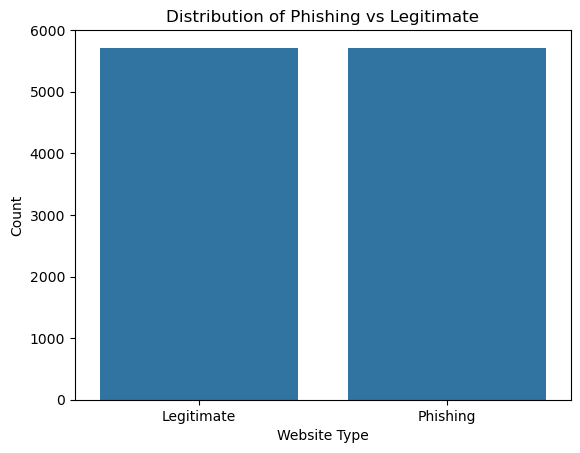

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='status', data=df)
plt.title('Distribution of Phishing vs Legitimate')
plt.xticks(ticks=[0,1], labels=['Legitimate', 'Phishing'])
plt.xlabel('Website Type')
plt.ylabel('Count')
plt.show()


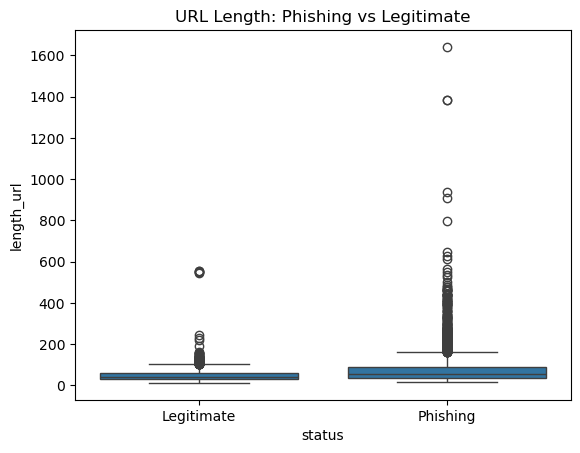

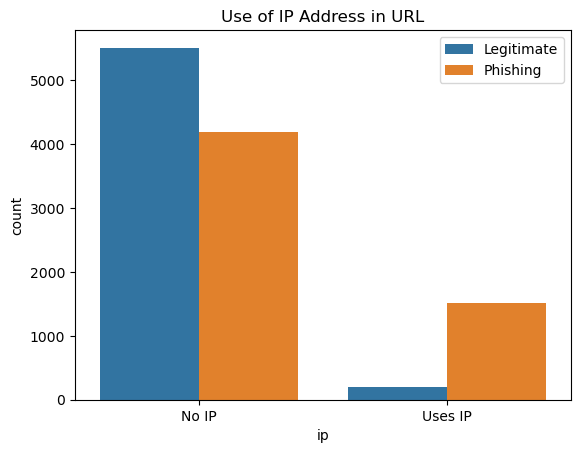

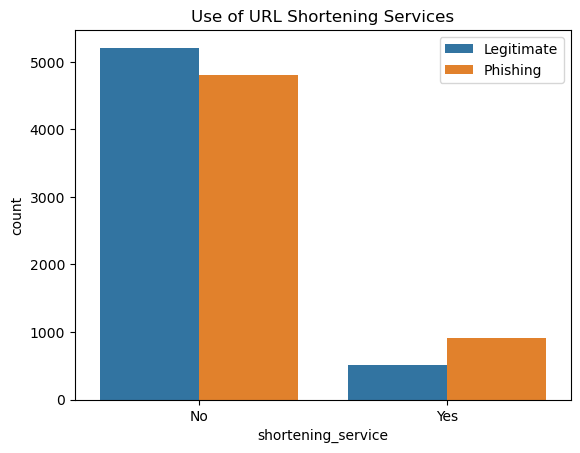

In [12]:
# URL length
sns.boxplot(x='status', y='length_url', data=df)
plt.title('URL Length: Phishing vs Legitimate')
plt.xticks([0,1], ['Legitimate', 'Phishing'])
plt.show()

# Use of IP Address
sns.countplot(x='ip', hue='status', data=df)
plt.title('Use of IP Address in URL')
plt.xticks([0,1], ['No IP', 'Uses IP'])
plt.legend(labels=['Legitimate', 'Phishing'])
plt.show()

# Shortening services
sns.countplot(x='shortening_service', hue='status', data=df)
plt.title('Use of URL Shortening Services')
plt.xticks([0,1], ['No', 'Yes'])
plt.legend(labels=['Legitimate', 'Phishing'])
plt.show()


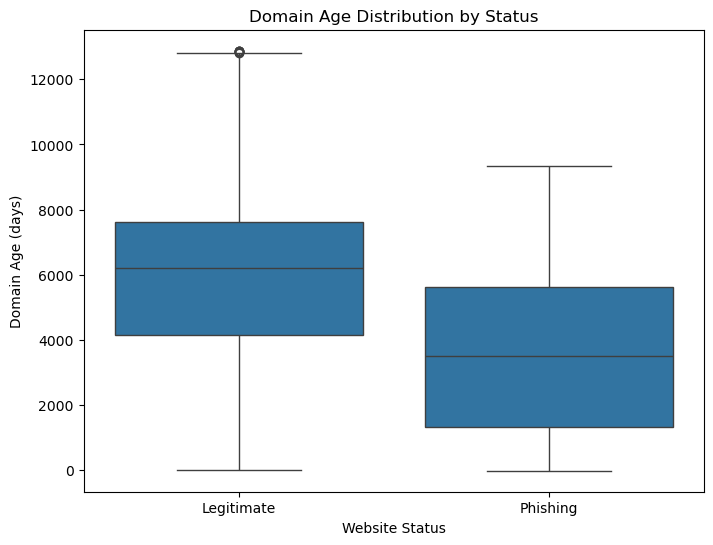

In [21]:
plt.figure(figsize=(8,6))
sns.boxplot(x='status', y='domain_age', data=df)

# Rename x-axis ticks for clarity
plt.xticks([0,1], ['Legitimate', 'Phishing'])

plt.title('Domain Age Distribution by Status')
plt.ylabel('Domain Age (days)')
plt.xlabel('Website Status')

plt.show()

In [18]:
import numpy as np

df['domain_age'] = df['domain_age'].replace(-1, np.nan)


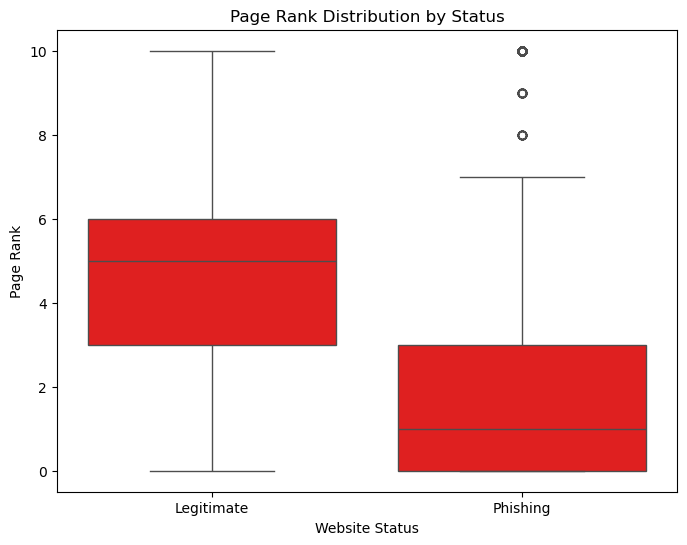

In [23]:
plt.figure(figsize=(8,6))
sns.boxplot(x='status', y='page_rank',color='red', data=df)
plt.xticks([0,1], ['Legitimate', 'Phishing'])
plt.title('Page Rank Distribution by Status')
plt.ylabel('Page Rank')
plt.xlabel('Website Status')
plt.show()


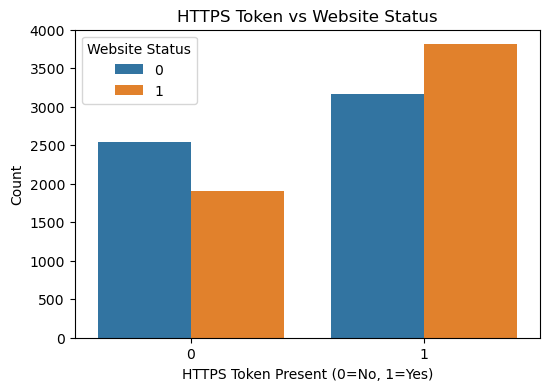

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='https_token', hue='status', data=df)
plt.title('HTTPS Token vs Website Status')
plt.xlabel('HTTPS Token Present (0=No, 1=Yes)')
plt.ylabel('Count')
plt.legend(title='Website Status')
plt.show()


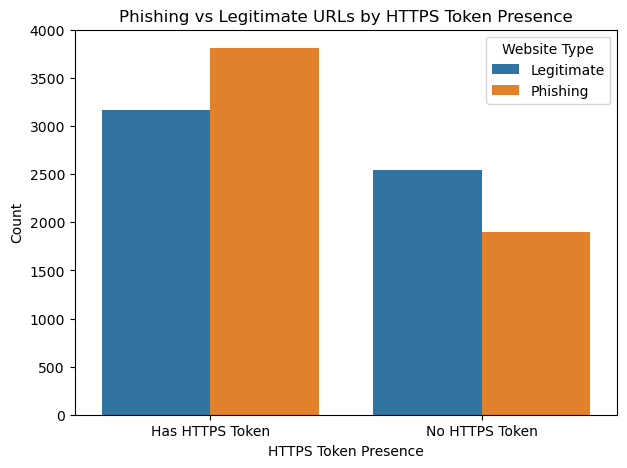

In [26]:
# Create label column based on existing 'status'
df['status_label'] = df['status'].map({0: 'Legitimate', 1: 'Phishing'})

# Assuming https_token is 0/1, map to descriptive labels
df['https_token_label'] = df['https_token'].map({0: 'No HTTPS Token', 1: 'Has HTTPS Token'})

# Example: display count of phishing vs legitimate by https_token presence
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.countplot(x='https_token_label', hue='status_label', data=df)
plt.title('Phishing vs Legitimate URLs by HTTPS Token Presence')
plt.xlabel('HTTPS Token Presence')
plt.ylabel('Count')
plt.legend(title='Website Type')
plt.show()


In [27]:
corr = df[['length_url', 'ip', 'shortening_service', 'domain_age', 'nb_hyphens', 'https_token', 'status']].corr()
print(corr['status'].sort_values(ascending=False))


status                1.000000
ip                    0.321698
length_url            0.248580
https_token           0.114669
shortening_service    0.106120
nb_hyphens           -0.100107
domain_age           -0.411540
Name: status, dtype: float64


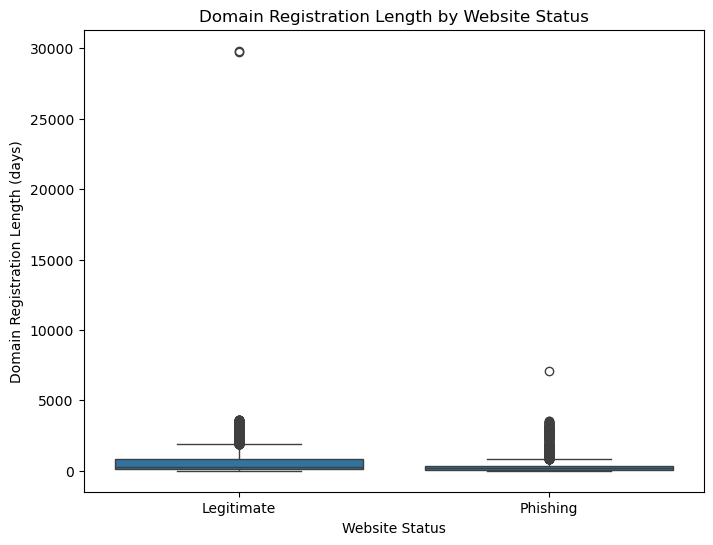

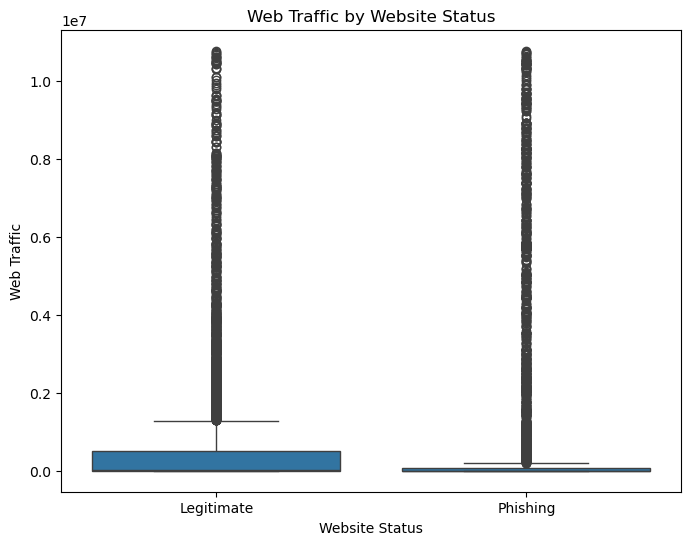

Correlation of Domain Registration Length with Status: -0.163
Correlation of Web Traffic with Status: 0.060


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Replace missing or invalid values if any (e.g., -1)
df['domain_registration_length'] = df['domain_registration_length'].replace(-1, np.nan)
df['web_traffic'] = df['web_traffic'].replace(-1, np.nan)

# Boxplot for Domain Registration Length
plt.figure(figsize=(8,6))
sns.boxplot(x='status', y='domain_registration_length', data=df)
plt.xticks([0,1], ['Legitimate', 'Phishing'])
plt.title('Domain Registration Length by Website Status')
plt.ylabel('Domain Registration Length (days)')
plt.xlabel('Website Status')
plt.show()

# Boxplot for Web Traffic
plt.figure(figsize=(8,6))
sns.boxplot(x='status', y='web_traffic', data=df)
plt.xticks([0,1], ['Legitimate', 'Phishing'])
plt.title('Web Traffic by Website Status')
plt.ylabel('Web Traffic')
plt.xlabel('Website Status')
plt.show()

# Correlation with target
corr_domain_reg = df['domain_registration_length'].corr(df['status'])
corr_web_traffic = df['web_traffic'].corr(df['status'])

print(f'Correlation of Domain Registration Length with Status: {corr_domain_reg:.3f}')
print(f'Correlation of Web Traffic with Status: {corr_web_traffic:.3f}')


In [29]:
df.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [ ]:
#The features used are ip: 0.0517
'''ip:
length_url: 
domain_age: 
https_token:
page_rank:''' 

In [30]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Select features and target
features = ['ip', 'length_url', 'domain_age', 'https_token', 'page_rank']
X = df[features]
y = df['status']

# Handle missing values if any (e.g., drop or impute)
X = X.fillna(-1)  # example imputation

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Feature importances
importances = model.feature_importances_
for f, imp in zip(features, importances):
    print(f"{f}: {imp:.4f}")


              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1157
           1       0.90      0.91      0.90      1129

    accuracy                           0.91      2286
   macro avg       0.91      0.91      0.91      2286
weighted avg       0.91      0.91      0.91      2286

[[1045  112]
 [ 105 1024]]
ip: 0.0517
length_url: 0.2306
domain_age: 0.3515
https_token: 0.0146
page_rank: 0.3515


In [33]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 90.51%


In [35]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   - -------------------------------------- 6.8/150.0 MB 46.5 MB/s eta 0:00:04
   ----- ---------------------------------- 19.7/150.0 MB 59.1 MB/s eta 0:00:03
   --------- ------------------------------ 37.2/150.0 MB 67.6 MB/s eta 0:00:02
   ---------------- ----------------------- 60.0/150.0 MB 78.0 MB/s eta 0:00:02
   -------------------- ------------------- 78.6/150.0 MB 82.2 MB/s eta 0:00:01
   ------------------------- -------------- 96.7/150.0 MB 82.3 MB/s eta 0:00:01
   ----------------------------- --------- 115.1/150.0 MB 83.5 MB/s eta 0:00:01
   --------------------------------- ----- 130.5/150.0 MB 83.4 MB/s eta 0:00:01
   ------------------------------------- - 145.5/150.0 MB 81.5 MB/s eta 0:00:01
   --------------------------------------  149.9/150.0 MB 81.2 MB/s eta 0:00:01
   --------------------------------------  149.9/150.0 MB 81.2 MB/s eta 0:00:01
   --------------------------------------- 150.0/1

In [36]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Features and target
features = ['ip', 'length_url', 'domain_age', 'https_token', 'page_rank']
X = df[features].fillna(-1)
y = df['status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy * 100:.2f}%")


XGBoost Accuracy: 90.64%


C:\Users\student\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:13:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [37]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Define parameter grid
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5]
}

# Initialize classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_clf, param_distributions=param_dist, n_iter=20,
    scoring='accuracy', cv=3, verbose=2, random_state=42, n_jobs=-1
)

# Fit on training data
random_search.fit(X_train, y_train)

print("Best parameters found: ", random_search.best_params_)

# Predict using the best estimator
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Tuned XGBoost Accuracy: {accuracy * 100:.2f}%")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters found:  {'subsample': 0.8, 'n_estimators': 50, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 0.8}
Tuned XGBoost Accuracy: 91.21%


C:\Users\student\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:15:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [38]:
from sklearn.metrics import classification_report

# Assuming y_test and y_pred are defined from your tuned model
print(classification_report(y_test, y_pred, target_names=['Legitimate', 'Phishing']))



              precision    recall  f1-score   support

  Legitimate       0.91      0.91      0.91      1157
    Phishing       0.91      0.91      0.91      1129

    accuracy                           0.91      2286
   macro avg       0.91      0.91      0.91      2286
weighted avg       0.91      0.91      0.91      2286

